In [78]:
from  PIL import Image
import numpy as np
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
import requests

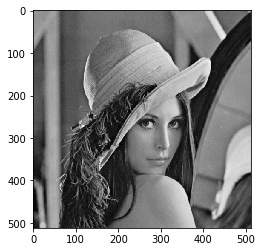

In [79]:
r = requests.get('http://eeweb.poly.edu/~yao/EL5123/image/lena_gray.bmp', stream=True)
img = np.asarray(Image.open(r.raw))
plt.imshow(img, cmap = 'gray')

In [80]:
sigma= 0.5
dx = gaussian_filter( img.astype(np.float64), (sigma,sigma), (0,1))
dy = gaussian_filter( img.astype(np.float64), (sigma,sigma), (1,0))

wxx = gaussian_filter(dx * dx, sigma)
wyy = gaussian_filter(dy * dy, sigma)
wxy = gaussian_filter(dx * dy, sigma)
det  = wxx * wyy - wxy * wxy
tr = wxx + wyy

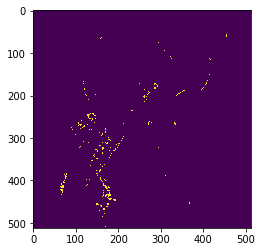

In [81]:
kappa = 0.04
th = 20000
harris_img = th < (det - kappa * tr)
#kappa = 0.001
#th = 30
#harris_img = th < (det /(kappa + tr))
plt.imshow( harris_img)